# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tools.TrajectoryTransformer import TrajectoryTransformer
from tools.TrajectoryVisualizer import TrajectoryVisualizer
from tools.TrajectoryCleaner import TrajectoryCleaner
from tools.ColMapper import ColMapper

visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0,
    maxSpeed = 2.5,
    minYDisplacement = 5.0,
    maxXDisplacement = 8.0,
)

In [5]:
pedDf = pd.read_csv(os.path.join(dataDir, "2022-12-09-fps-5-scene-21-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, "2022-12-09-fps-5-scene-21-others.csv"))

In [6]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,4439,18074,21,9.0,6.966410,-4.383357,-0.291199,-0.858803,-0.071751,0.273107
1,18,4444,18074,21,9.0,7.022771,-4.198740,-0.281803,-0.923083,-0.046980,0.321400
2,18,4449,18074,21,9.0,7.078075,-3.999412,-0.276523,-0.996638,-0.026400,0.367774
3,18,4454,18074,21,9.0,7.132949,-3.783701,-0.274369,-1.078555,-0.010770,0.409585
4,18,4459,18074,21,9.0,7.187838,-3.550268,-0.274446,-1.167166,0.000388,0.443056


In [7]:
print(pedDf["uniqueTrackId"].unique())

[18074 18116 18339 18365 19072 19094 20287 21034 21306 21358 21426 21549
 22016 22226 22313 22531 23395 23437 24211 24253 25288 25300 25472 26085
 26161 26223 26231 26475 27258 27374 27530 28230 28242 29106 29238 29240
 29303 29529 29586]


In [8]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,1437.000000,1437.000000,1437.000000,1437.0,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,23.874739,16150.919276,24165.958246,21.0,9.0,1.656123,0.301633,0.108469,-0.006017,-0.010428,-0.003096,1.451112,5.444630,4.689997
std,3.538827,8826.547288,3588.428878,0.0,0.0,5.404101,2.549257,1.177875,1.103737,0.355469,0.303622,0.714313,5.268630,2.540027
min,18.000000,570.000000,18074.000000,21.0,9.0,-7.429797,-4.761115,-6.010263,-2.012759,-1.758291,-1.100709,0.087181,0.000000,0.000000
25%,21.000000,10341.000000,21358.000000,21.0,9.0,-3.764739,-1.846834,-0.207005,-1.091347,-0.199982,-0.171317,1.182533,0.292785,2.536523
50%,24.000000,15657.000000,24211.000000,21.0,9.0,3.064096,0.699638,0.089604,-0.148629,-0.000836,-0.001037,1.348852,3.902314,5.082995
75%,27.000000,22841.000000,27258.000000,21.0,9.0,6.935669,2.385241,0.604625,1.083675,0.186201,0.171007,1.568855,10.731149,6.768598
max,29.000000,31650.000000,29586.000000,21.0,9.0,7.801142,4.734512,3.378489,1.845924,2.001175,1.306338,6.014435,14.396207,9.117868


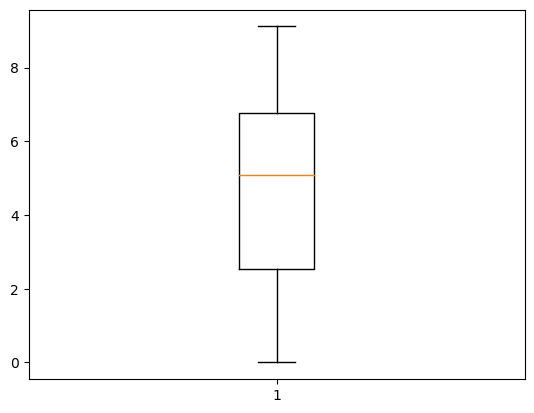

{'whiskers': [<matplotlib.lines.Line2D at 0x2dac925d760>,
 'caps': [<matplotlib.lines.Line2D at 0x2dac925dca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dac925d4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2dac92aa100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dac92aa3a0>],
 'means': []}

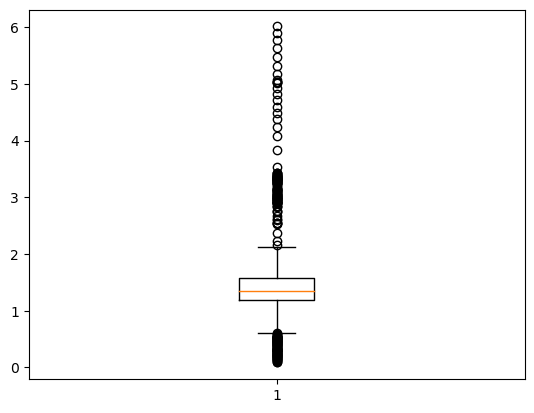

In [15]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [10]:
outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
outliers

IQR value for column speed is: 0.40339522234238645
using range (0.8635602991306455, 2.477141188500191)


,speed
uniqueTrackId,
21426,5.031540
21549,6.014435
28230,3.433215
29106,3.244311
29238,3.360940
29240,3.399488


In [14]:
outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=True, returnVals=True)
outliers

IQR value for column displacementY is: 1.257236866377955
using range (5.789113543475191, 10.81806100898701)


,displacementY
uniqueTrackId,
20287,5.405291
21426,2.836787
21549,3.336417
29240,5.607964


In [17]:
cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)

IQR value for column speed is: 0.40339522234238645
using range (0.8635602991306455, 2.477141188500191)


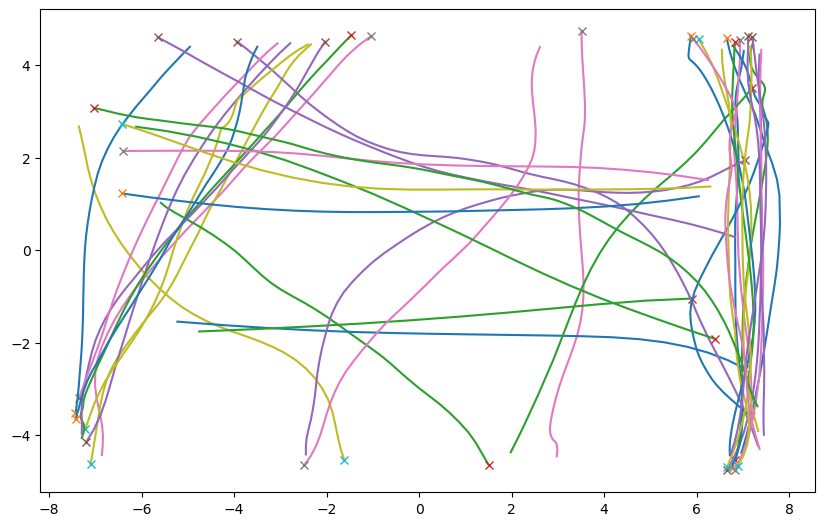

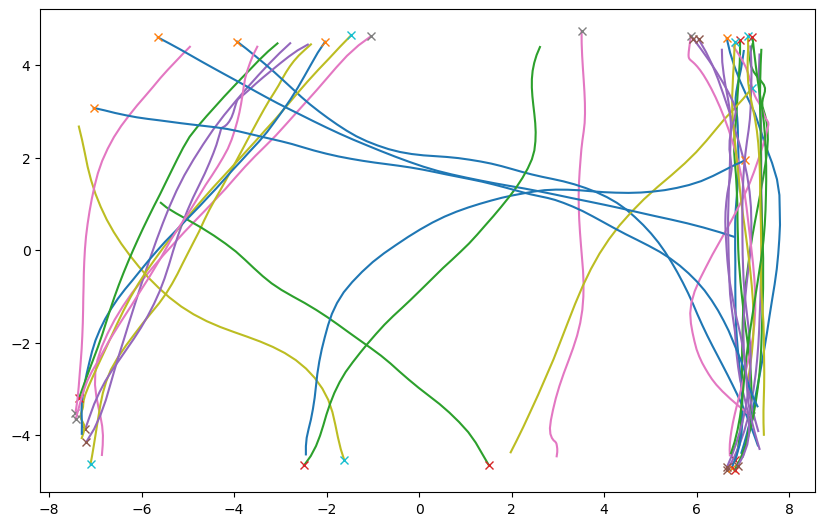

In [18]:
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [ ]:
df18074 = pedDf[pedDf["uniqueTrackId"] == 18074]
# visualizer.show(df18074, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
df29586 = pedDf[pedDf["uniqueTrackId"] == 29586]
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[18074, 29586])

In [ ]:
X, Y = transformer.translateOneToLocalSource(df18074, "sceneX", "sceneY")
print(list(zip(X, Y)))

In [ ]:
trackDf["localX"]
trackDf["localY"]